<a href="https://colab.research.google.com/github/Dominika26/UMWF/blob/main/Smoczynska_simple_portfolio_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=8d635257b60a3d33b325eac7d831df23b88cee2bd891b36f411ea921efd9baf8
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import ta

In [ ]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
print(tickers.columns)
symbols = tickers.Ticker.to_list()
print(symbols[1:10])
df = yf.download(symbols, start = '2022-10-01')['Adj Close']
print(df.head())

Index(['Company', 'Ticker', 'GICS Sector', 'GICS Sub-Industry'], dtype='object')
['ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI']


[*********************100%%**********************]  101 of 101 completed

Ticker            AAPL        ABNB        ADBE         ADI         ADP  \
Date                                                                     
2022-10-03  141.052032  105.000000  285.239990  141.121689  224.695679   
2022-10-04  144.666245  110.809998  294.970001  146.683716  228.923553   
2022-10-05  144.963287  111.760002  297.380005  147.694962  231.274536   
2022-10-06  144.002792  111.580002  298.410004  146.800400  227.249817   
2022-10-07  138.715225  108.540001  288.769989  140.917465  219.732559   

Ticker            ADSK        AEP       AMAT        AMD        AMGN  ...  \
Date                                                                 ...   
2022-10-03  192.460007  82.226227  85.106094  66.110001  217.933365  ...   
2022-10-04  199.990005  84.490883  88.224197  67.900002  220.373337  ...   
2022-10-05  204.529999  81.732292  88.036713  67.940002  221.129929  ...   
2022-10-06  205.869995  78.759361  86.951302  67.849998  218.406235  ...   
2022-10-07  194.740005  7

In [ ]:
df.dropna(axis = 1, inplace = True)
df = (df.pct_change()+1)[1:].resample("M").prod()
df.head()

#Na wyrzucone, potem liczenie stóp zwrotu jako jakieś procentowe i dodanie jedynki (czynnik oprocentowujący), pracujemy na miesięcznych przez resample,
#do interpretacji odejmujemy jedynkę

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31,1.076448,1.018191,1.116604,0.982705,1.040689,1.113478,0.996486,1.023652,0.908486,1.173190,...,0.870931,1.045166,1.012955,1.048578,1.048986,1.125501,1.087866,1.010178,0.993439,0.903759
2022-11-30,0.966972,0.955383,1.082983,1.205371,1.092842,0.942370,1.111336,1.244386,1.292541,1.066664,...,0.979339,0.892049,1.123451,1.004813,1.014103,1.150369,0.876923,1.077525,1.078482,0.865996
2022-12-31,0.877727,0.837086,0.975647,0.958410,0.908675,0.925328,0.980888,0.888504,0.834342,0.917039,...,0.859801,0.985240,0.915549,0.961932,0.912705,0.900241,0.831579,0.996605,1.005288,0.838516
2023-01-31,1.110521,1.299532,1.100467,1.045358,0.945365,1.151389,0.989574,1.144896,1.160259,0.961011,...,1.130939,1.087391,1.080213,1.030439,1.118845,0.986617,1.563291,1.084265,0.980887,1.109562
2023-02-28,1.023183,1.109531,0.874737,1.074963,0.973473,0.923452,0.944927,1.044237,1.045642,0.925923,...,1.103747,0.967500,0.967496,0.941251,0.898453,0.976674,1.053981,1.022268,0.938927,1.056298


In [ ]:
def get_rtn(df, n):
  return df.rolling(n).apply(np.prod)

#zmnienia te roczne stopy na 12-miesięczne, 6, 3 itd

In [ ]:
def get_top(date, df):
  r12 = get_rtn(df, 12)
  r6 = get_rtn(df, 6)
  r3 = get_rtn(df, 3)
  #50 najwyższych spółek
  top50 = r12.loc[date].nlargest(50).index
  #z 50 30 spółek najwyższych o 6 mesięcznych
  top30 = r6.loc[date, top50].nlargest(30).index
  #z 30 10 najwyższych przez 3 miesiące
  top_10 = r3.loc[date, top30].nlargest(10).index
  return top_10

get_top('2023-02-28', df)



Index(['BKNG', 'ABNB', 'ANSS', 'CDNS', 'AVGO', 'ADI', 'CDW', 'AMAT', 'BKR',
       'CPRT'],
      dtype='object', name='Ticker')

In [ ]:
import random

def get_random(date, df):
  numbers = [random.randint(1, df.shape[1]) for i in range(10)]
  names = df.columns[numbers]
  random_10 = df.loc[date, names].index
  return random_10

get_random('2023-02-28', df)

Index(['GOOGL', 'ROST', 'AMD', 'NFLX', 'CPRT', 'ADSK', 'FAST', 'DLTR', 'FANG',
       'ON'],
      dtype='object', name='Ticker')

In [ ]:
def portfolio_res(date, df):
  #1:2 robi dla przyszłęgo miesiąca
  return np.mean(df.loc[date:,get_top(date,df)][1:2])

[1.0960848941894445, 0.9103647411748884, 1.074408636757414, 1.0272501894416013, 1.043807536909021, 0.9502062746003803, 1.0620889223172019, 1.0307919151149576, 1.0627335924299364, 0.9724185242445312, 0.9765852831324654, 0.9638357922604944, 1.1290016090191446, 1.0383775226970817, 1.0122444631692675, 1.0466310317311391, 1.0368310688136244, 0.939283775368423, 1.0584571394415447]


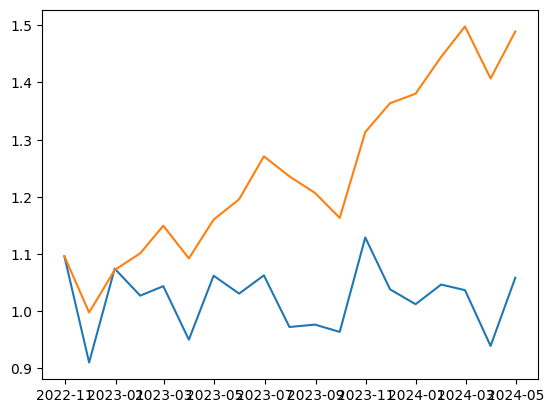

In [ ]:
dates = df.index[:-1]
returns = []
for d in dates:
  returns.append(portfolio_res(d, df))


print(returns)

plt.plot(dates, returns)
cum_returns = pd.Series(returns).cumprod()
plt.plot(dates, cum_returns)


#Podajemy listę jako odpowiedź

In [ ]:
df

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31,1.076448,1.018191,1.116604,0.982705,1.040689,1.113478,0.996486,1.023652,0.908486,1.173190,...,0.870931,1.045166,1.012955,1.048578,1.048986,1.125501,1.087866,1.010178,0.993439,0.903759
2022-11-30,0.966972,0.955383,1.082983,1.205371,1.092842,0.942370,1.111336,1.244386,1.292541,1.066664,...,0.979339,0.892049,1.123451,1.004813,1.014103,1.150369,0.876923,1.077525,1.078482,0.865996
2022-12-31,0.877727,0.837086,0.975647,0.958410,0.908675,0.925328,0.980888,0.888504,0.834342,0.917039,...,0.859801,0.985240,0.915549,0.961932,0.912705,0.900241,0.831579,0.996605,1.005288,0.838516
2023-01-31,1.110521,1.299532,1.100467,1.045358,0.945365,1.151389,0.989574,1.144896,1.160259,0.961011,...,1.130939,1.087391,1.080213,1.030439,1.118845,0.986617,1.563291,1.084265,0.980887,1.109562
2023-02-28,1.023183,1.109531,0.874737,1.074963,0.973473,0.923452,0.944927,1.044237,1.045642,0.925923,...,1.103747,0.967500,0.967496,0.941251,0.898453,0.976674,1.053981,1.022268,0.938927,1.056298
2023-03-31,1.118649,1.009085,1.189597,1.074944,1.018519,1.047662,1.034330,1.057512,1.247264,1.043555,...,1.088456,1.089000,1.084923,1.123378,1.085363,0.973262,0.966709,1.113603,1.052832,0.890812
2023-04-30,1.028987,0.961977,0.979734,0.912078,0.988187,0.935771,1.015716,0.920215,0.911846,0.991686,...,1.056313,1.041827,0.898876,1.011727,1.081442,1.019375,0.901324,0.901230,1.036625,0.771206
2023-05-31,1.046058,0.917272,1.106553,0.987825,0.949955,1.023615,0.907548,1.182372,1.322703,0.929056,...,1.089214,1.108134,1.047959,1.128793,0.949638,0.874664,0.828802,1.138874,0.933915,1.503663
2023-06-30,1.094330,1.167532,1.170420,1.101599,1.057785,1.026180,1.012993,1.084321,0.963624,1.006209,...,1.101884,1.068467,1.035312,1.033200,1.087585,0.938097,1.111702,1.065569,0.960122,1.079864


In [ ]:
dates = df.index[:-1]

In [ ]:
ticker_counter = Counter()
for d in dates:
    top_tickers = get_top(d, df)
    ticker_counter.update(top_tickers)

In [ ]:
most_common_tickers = ticker_counter.most_common(3)
print("Three most frequently occurring tickers:", most_common_tickers)

Three most frequently occurring tickers: [('AMAT', 10), ('AMD', 10), ('AVGO', 9)]


In [ ]:
top3_tickers = [ticker[0] for ticker in most_common_tickers]

In [ ]:
top3_data = yf.download(top3_tickers, start='2022-10-01')


[*********************100%%**********************]  3 of 3 completed


In [ ]:
new_df = pd.DataFrame()
stock_list = ['AMD', 'AMAT', 'AVGO']
for stock in stock_list:
  print(stock)
  df_t = yf.download(stock, start = '2022-10-01')
  print(df_t.head())
  df[f"rsi_{stock}"] = ta.momentum.RSIIndicator(close=df_t["Adj Close"]).rsi()
  df[f"bb_high_indicator_{stock}"] = ta.volatility.bollinger_hband_indicator(df_t["Adj Close"], window=20, window_dev=2)
  df[f"bb_low_indicator_{stock}"] = ta.volatility.bollinger_lband_indicator(df_t["Close"], window=20, window_dev=2, fillna=True)

  new_df.join(df_t)

print(new_df.tail())
print(new_df.shape)

AMD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2022-10-03  64.459999  66.910004  63.389999  66.110001  66.110001   83841600
2022-10-04  68.269997  69.180000  67.330002  67.900002  67.900002   77160500
2022-10-05  66.589996  68.690002  64.519997  67.940002  67.940002   87127400
2022-10-06  67.820000  70.290001  67.660004  67.849998  67.849998   98325900
2022-10-07  64.010002  64.029999  58.220001  58.439999  58.439999  163786300
AMAT
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-10-03  83.040001  87.610001  83.010002  86.250000  85.106094   9631500
2022-10-04  89.120003  90.269997  88.470001  89.410004  88.224197   7914900
2022-10-05  87.650002  90.169998  86.190002  89.220001  88.036720   7608600
2022-10-06  88.980003  91.190002  87.879997  88.120003  86.951294   6686700


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-03  449.239990  460.950012  446.970001  456.779999  441.041351   
2022-10-04  468.500000  480.160004  465.859985  479.859985  463.326080   
2022-10-05  472.549988  488.089996  471.459991  484.799988  468.095856   
2022-10-06  483.790009  489.700012  478.720001  479.500000  462.978516   
2022-10-07  472.380005  473.339996  459.019989  460.480011  444.613861   

             Volume  
Date                 
2022-10-03  2147900  
2022-10-04  2727700  
2022-10-05  1849300  
2022-10-06  1725000  
2022-10-07  2842500  
Empty DataFrame
Columns: []
Index: []
(0, 0)


In [ ]:
weights = {
    'class_1': [0.2, 0.2, 0.6],
    'class_2': [0.6, 0.2, 0.2],
    'class_3': [0.2, 0.6, 0.2]
}

In [ ]:
def portfolio_res_w(date,df,w):
  return w*(df.loc[date:,[spolki_wybrane]][1:2])

In [ ]:
stock_list = ['AMD', 'AMAT', 'AVGO']

# Download stock data and calculate indicators
indicators = {}
for stock in stock_list:
    df_t = yf.download(stock, start='2022-10-01')
    df_t[f"rsi_{stock}"] = ta.momentum.RSIIndicator(close=df_t["Adj Close"]).rsi()
    df_t[f"bb_high_indicator_{stock}"] = ta.volatility.BollingerBands(close=df_t["Adj Close"], window=20, window_dev=2).bollinger_hband_indicator()
    df_t[f"bb_low_indicator_{stock}"] = ta.volatility.BollingerBands(close=df_t["Adj Close"], window=20, window_dev=2).bollinger_lband_indicator()
    indicators[stock] = df_t

# Create the combined DataFrame for the technical indicators
combined_df = pd.concat([indicators[stock][['Adj Close', f'rsi_{stock}', f'bb_high_indicator_{stock}', f'bb_low_indicator_{stock}']] for stock in stock_list], axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
import yfinance as yf
import ta

stock_list = ['AMD', 'AMAT', 'AVGO']


indicators = {}


for stock in stock_list:
    df_t = yf.download(stock, start='2022-10-01')
    df_t[f"rsi_{stock}"] = ta.momentum.RSIIndicator(close=df_t["Adj Close"]).rsi()
    df_t[f"bb_high_indicator_{stock}"] = ta.volatility.BollingerBands(close=df_t["Adj Close"], window=20, window_dev=2).bollinger_hband_indicator()
    df_t[f"bb_low_indicator_{stock}"] = ta.volatility.BollingerBands(close=df_t["Adj Close"], window=20, window_dev=2).bollinger_lband_indicator()
    indicators[stock] = df_t


combined_df = pd.concat([indicators[stock][['Adj Close', f'rsi_{stock}', f'bb_high_indicator_{stock}', f'bb_low_indicator_{stock}']] for stock in stock_list], axis=1)


weights = {
    'class_1': [0.2, 0.2, 0.6],
    'class_2': [0.6, 0.2, 0.2],
    'class_3': [0.2, 0.6, 0.2]
}

weighted_classes = {}
for class_name, weight in weights.items():
    weighted_class = pd.DataFrame(index=combined_df.index)
    for i, stock in enumerate(stock_list):
        weighted_stock = combined_df[[f'Adj Close', f'rsi_{stock}', f'bb_high_indicator_{stock}', f'bb_low_indicator_{stock}']].copy()
        weighted_stock = weighted_stock.mul(weight[i])
        weighted_class = weighted_class.add(weighted_stock, fill_value=0)
    weighted_classes[class_name] = weighted_class

for class_name, class_df in weighted_classes.items():
    print(f"\n{class_name}:\n", class_df.tail())
    print(f"\nShape of {class_name}:", class_df.shape)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



class_1:
              Adj Close   Adj Close   Adj Close   Adj Close   Adj Close  \
Date                                                                     
2024-05-13  150.559998  184.202002  862.730005  161.773999  195.416003   
2024-05-14  153.160004  187.156006  889.282019  164.492004  198.488007   
2024-05-15  159.669998  194.362003  925.570026  171.234000  205.926004   
2024-05-16  162.619995  193.465997  912.326001  172.901996  203.747998   
2024-05-17  164.470001  193.036002  902.962024  173.992001  202.558002   

             Adj Close   Adj Close   Adj Close    Adj Close   Adj Close  ...  \
Date                                                                     ...   
2024-05-13  873.944006  387.950000  421.592004  1100.120007  161.773999  ...   
2024-05-14  900.614020  398.534009  432.530011  1134.656024  164.492004  ...   
2024-05-15  937.134027  414.970007  449.662012  1180.870035  171.234000  ...   
2024-05-16  922.608002  412.521997  443.367999  1162.228003  172.90199